<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Niloofar Hosseinzadeh

**Student ID**: 400101001





## Importing Libraries

First we import libraries that we need for this assignment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [ ]:
X, Y = None, None
### START CODE HERE ###
df = pd.read_csv("data_logistic.csv")
X = df[['X1', 'X2', 'X3']].values
Y = df['Y'].values
### END CODE HERE ###
print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: Normalizing data before training in machine learning is essential for ensuring fair feature representation, facilitating faster convergence of optimization algorithms, enhancing model stability, improving algorithm performance, aiding model interpretability, and overall, creating a standardized scale for features. By normalizing data, we mitigate issues of biased results, numerical instability, and feature dominance, leading to more robust and accurate machine learning models. This preprocessing step sets the stage for effective learning and better model performance.

In [ ]:
### START CODE HERE ###
X = (X - X.mean(axis=0)) / X.std(axis=0)
print(X)
### END CODE HERE ###

[[-1.00066149 -0.60536985 -0.85021999]
 [-1.45366949  1.73051062 -0.20238503]
 [ 0.26239007  1.69140966  0.64234794]
 ...
 [ 1.35418019 -0.1188587   1.41249602]
 [ 1.41727838  0.76498604  0.94404812]
 [ 0.79312016  1.49592029  0.85670437]]


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [ ]:
### START CODE HERE ###
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
### END CODE HERE ###
print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [ ]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''

    Z = np.clip(Z, -500, 500)
    return 1 / (1 + np.exp(-Z))


vector = np.array([5,1,2])
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(sigmoid(vector))
print("----------")
print(sigmoid(matrix))

[0.99330715 0.73105858 0.88079708]
----------
[[0.73105858 0.88079708 0.95257413]
 [0.98201379 0.99330715 0.99752738]
 [0.99908895 0.99966465 0.99987661]]


### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [ ]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is an n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost
    '''
    loss = None
    n, d = X.shape


    h = sigmoid(np.dot(X, theta))
    loss = np.sum(- y * np.log(h) - (1 - y) * np.log(1 - h)) / n
    loss += (regLambda / 2) * np.sum(np.square(theta[1:]))
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
$$
\frac{\partial J(\theta)}{\partial \theta_j} = - \sum_{i=1}^{n} \left[ y^{(i)} \frac{1}{h_{\theta}(x^{(i)})} h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))(x_j^{(i)}) - (1 - y^{(i)}) \frac{1}{1 - h_{\theta}(x^{(i)})} h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))(x_j^{(i)})  \right] + \lambda\theta_j
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j}= \sum_{i=1}^{n} \left[ (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \right] + \lambda\theta_j
$$

In [ ]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, a d-dimensional vector
    '''
    n, d = X.shape
    grad = np.zeros(d)

    h = sigmoid(np.dot(X, theta))
    for i in range(d) :
        grad[i] = np.sum((h - y) * X[:, i])
        if i != 0:
            grad[i] = grad[i] +  regLambda * theta[i]
    grad = grad/n
    return grad


### Training and Prediction
Once you have the cost and gradient functions complete, implement the fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [ ]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    n, d = X.shape
    theta = np.zeros(d)
    loss_history = []

    for i in range(maxNumIters):

        new_theta = theta - alpha * computeGradient(theta, X, y, regLambda)
        if hasConverged(theta, new_theta, epsilon):
            break

        theta = new_theta
        loss_history.append(computeCost(theta, X, y, regLambda))

    return theta, loss_history



def hasConverged(old_theta, new_theta, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''

    if np.linalg.norm(new_theta - old_theta) <= epsilon:
        return True

    return False


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [ ]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
print(theta)
print("--------")
for i in range(len(loss_history)):
  print(loss_history[i])
### END CODE HERE ###

[ 0.14721272 -0.21750811  0.23679233  0.07455652]
--------
0.691486974579138
0.689835270182226
0.6881920239634439
0.6865571925617295
0.6849307326645779
0.6833126010118342
0.6817027543994215
0.680101149683006
0.6785077437815997
0.6769224936810995
0.6753453564377617
0.6737762891816156
0.6722152491198126
0.6706621935399111
0.6691170798131005
0.6675798653973611
0.6660505078405617
0.6645289647834939
0.6630151939628445
0.6615091532141066
0.6600108004744274
0.6585200937853946
0.6570369912957632
0.6555614512641189
0.6540934320614824
0.6526328921738526
0.6511797902046905
0.6497340848773432
0.648295735037409
0.6468646996550429
0.6454409378272054
0.6440244087798513
0.6426150718700647
0.6412128865881322
0.6398178125595644
0.6384298095470586
0.6370488374524073
0.6356748563183515
0.6343078263303812
0.6329477078184789
0.6315944612588136
0.6302480472753803
0.628908426641587
0.6275755602817924
0.6262494092727912
0.6249299348452488
0.6236170983850883
0.6223108614348262
0.6210111856948621
0.6197180330247

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=111/500, random_state=42)

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [ ]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    Y = None
    ### START CODE HERE ###
    h_theta = sigmoid(np.dot(X,theta))
    # Convert probabilities to binary predictions based on a threshold of 0.5
    Y = (h_theta >= 0.5).astype(int)
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

Learning Rate (Alpha):

Effect: The learning rate determines how quickly the model learns from the training data. A high learning rate can cause the model to converge quickly but may overshoot the optimal solution, leading to oscillations or divergence. On the other hand, a low learning rate may converge slowly but more reliably to the optimal solution.

Best Approach:

It is essential to choose an appropriate learning rate that balances convergence speed and stability. Generally, a learning rate that is too high can lead to instability, while a learning rate that is too low can result in slow convergence.

Regularization Constant (RegLambda):

Effect:

Regularization is used to prevent overfitting by penalizing large parameter values. A higher regularization constant increases the penalty for large coefficients, encouraging the model to choose simpler models with smaller coefficients. On the other hand, a lower regularization constant allows the model to fit the training data more closely, which can lead to overfitting.
Best Approach:

The choice of regularization constant depends on the complexity of the dataset and the degree of overfitting. Cross-validation or grid search can be used to find the optimal regularization constant that balances bias and variance in the model.

As you can see I found the best values of these parameteres and printed them.

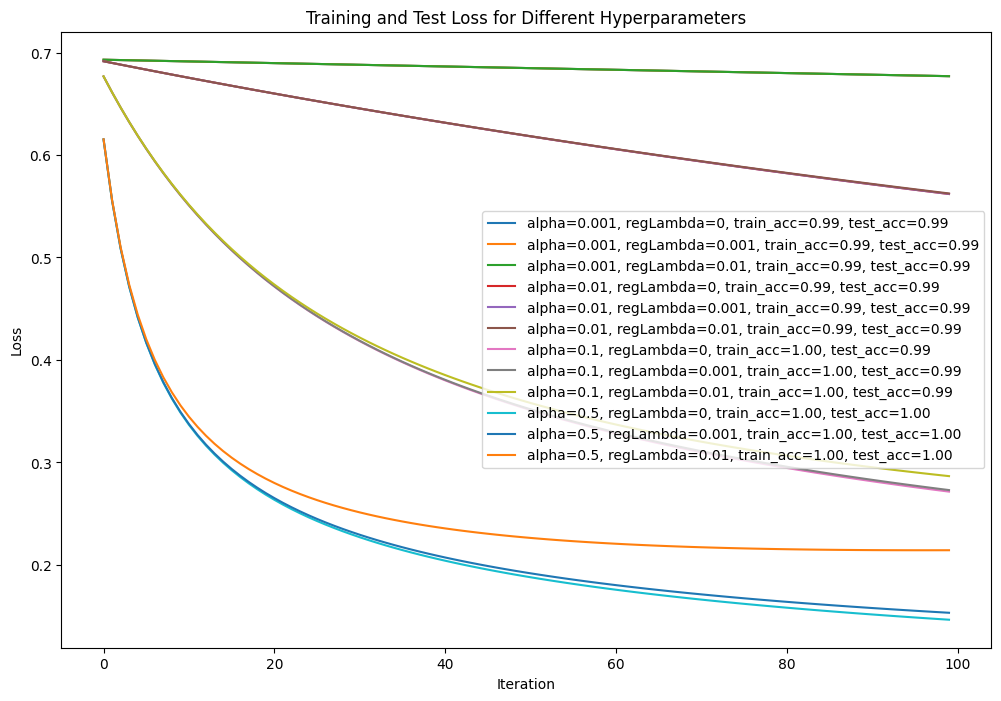

Best parameters:
Alpha: 0.5
RegLambda: 0
Test Accuracy with Best Parameters: 1.00


In [ ]:
alpha_values = [0.001,0.01, 0.1, 0.5]
regLambda_values = [0, 0.001, 0.01]

plt.figure(figsize=(12, 8))


for alpha in alpha_values:
    for regLambda in regLambda_values:

        theta, loss_history = fit(X_train, Y_train, regLambda, alpha)

        Y_train_pred = predict(X_train, theta)
        Y_test_pred = predict(X_test, theta)

        train_accuracy = accuracy_score(Y_train, Y_train_pred)
        test_accuracy = accuracy_score(Y_test, Y_test_pred)


        plt.plot(loss_history, label=f'alpha={alpha}, regLambda={regLambda}, train_acc={train_accuracy:.2f}, test_acc={test_accuracy:.2f}')


plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Test Loss for Different Hyperparameters')
plt.legend()
plt.show()




best_accuracy = 0
best_alpha = None
best_regLambda = None


for alpha in alpha_values:
    for regLambda in regLambda_values:

        theta, loss_history = fit(X_train, Y_train, regLambda, alpha)


        Y_test_pred = predict(X_test, theta)


        test_accuracy = accuracy_score(Y_test, Y_test_pred)


        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_alpha = alpha
            best_regLambda = regLambda

print("Best parameters:")
print(f"Alpha: {best_alpha}")
print(f"RegLambda: {best_regLambda}")
print(f"Test Accuracy with Best Parameters: {best_accuracy:.2f}")

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.957

In [ ]:
### START CODE HERE ###
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Gaussian Naive Bayes classifier on the test set: {accuracy}")
### END CODE HERE ###

Accuracy of Gaussian Naive Bayes classifier on the test set: 0.957


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.987

In [ ]:
### START CODE HERE ###
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy of the LDA classifier on the test set: {accuracy}")
### END CODE HERE ###

Accuracy of the LDA classifier on the test set: 0.987


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: The best method is the one which gives the best accuracy.As you can see in these three methods the most accuracy is for logistic regression that is 0.99